In [87]:
import numpy as np
import random
import math
import scipy.stats

import thinkstats2
import thinkplot
import brfss
import first
import hinc
import hinc2

In [7]:
df = brfss.ReadBrfss()

In [47]:
female = df[df.sex==2]
fem_hgts = female.htm3.dropna()
mean, var = fem_hgts.mean(), fem_hgts.var()

In [48]:
std = math.sqrt(var)
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean+std)

0.03328731904744125

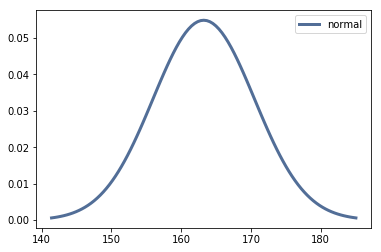

<Figure size 576x432 with 0 Axes>

In [49]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Show()

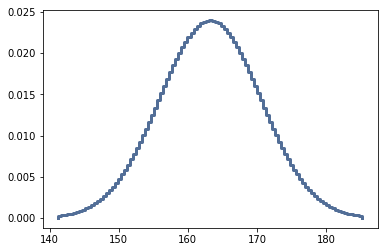

In [50]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf)

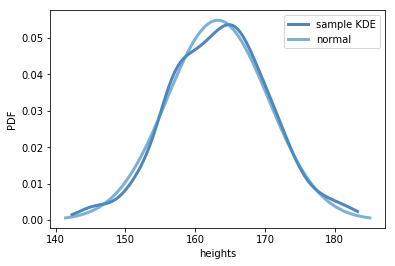

<Figure size 576x432 with 0 Axes>

In [51]:
sample = [random.gauss(mean, std) for i in range(500)]
sample_pdf = thinkstats2.EstimatedPdf(sample)

thinkplot.PrePlot(2)
thinkplot.Pdf(sample_pdf, label='sample KDE')
thinkplot.Pdf(pdf, label='normal')
thinkplot.Show(xlabel='heights', ylabel='PDF')

In [52]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x-mean)**k for x in xs) / len(xs)

In [58]:
mean, var = RawMoment(fem_hgts, 1), CentralMoment(fem_hgts, 2)
mean, var

(163.22347500412215, 52.84042567529328)

In [60]:
RawMoment(fem_hgts, 2), RawMoment(fem_hgts, 3)

(26694.74321809659, 4374411.46250422)

In [61]:
def Mean(xs):
    return RawMoment(xs, 1)

def var(xs):
    return CentralMoment(xs, 2)    

In [76]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)    

In [77]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean-median) / std
    return gp

In [78]:
live, firsts, others = first.MakeFrames()
data = live.totalwgt_lb.dropna()

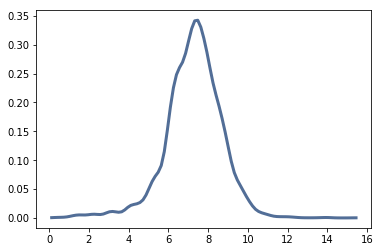

In [79]:
pdf = thinkstats2.EstimatedPdf(data)
thinkplot.Pdf(pdf, label='birth weight')

In [80]:
Skewness(data), PearsonMedianSkewness(data)

(-0.5895062687577989, -0.23300028954731833)

In [82]:
df = brfss.ReadBrfss(nrows=None)
data2 = df.wtkg2.dropna()

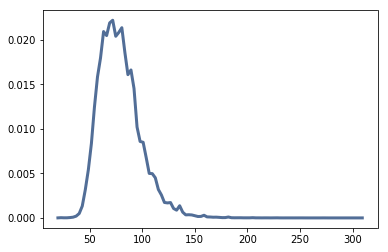

In [83]:
pdf2 = thinkstats2.EstimatedPdf(data2)
thinkplot.Pdf(pdf2)

In [84]:
Skewness(data2), PearsonMedianSkewness(data2)

(1.054840012109306, 0.2643673381618039)

In [89]:
hin = hinc.ReadData()

In [93]:
log_sample = hinc2.InterpolateSample(hin, log_upper=6.0)

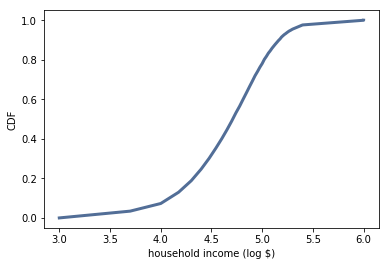

In [97]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='household income (log $)', ylabel='CDF')

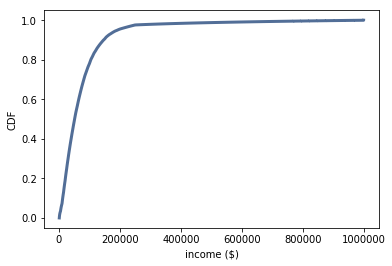

In [104]:
sample = np.power(10, log_sample)
cdf_sample = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf_sample)
thinkplot.Config(xlabel='income ($)', ylabel='CDF')

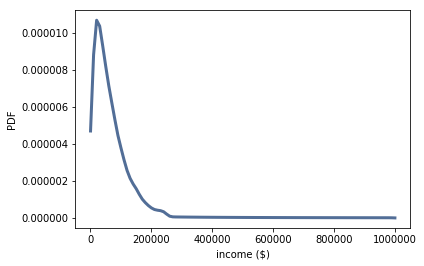

In [107]:
pdf_sample = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(pdf_sample)
thinkplot.Config(xlabel='income ($)', ylabel='PDF')

In [112]:
mean, median = Mean(sample), Median(sample)
mean, median

(74278.70753118733, 51226.45447894046)

In [113]:
sam_skew, pear_skew = Skewness(sample), PearsonMedianSkewness(sample)
sam_skew, pear_skew

(4.949920244429583, 0.7361258019141782)

In [115]:
cdf_sample.Prob(mean) * 100

66.0005879566872

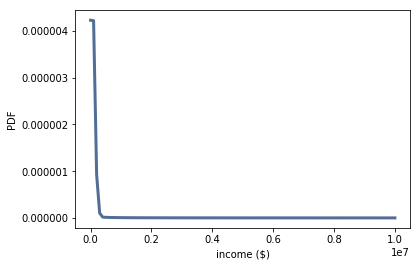

In [117]:
log_sam = hinc2.InterpolateSample(hin, log_upper=7)
sam = np.power(10, log_sam)
pdf_sam = thinkstats2.EstimatedPdf(sam)
thinkplot.Pdf(pdf_sam)
thinkplot.Config(xlabel='income ($)', ylabel='PDF')

In [ ]:
#If the upper bound is assumed to be higher, the values will be more skewed to the left